In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
image = '/content/bullet-space.jpg'

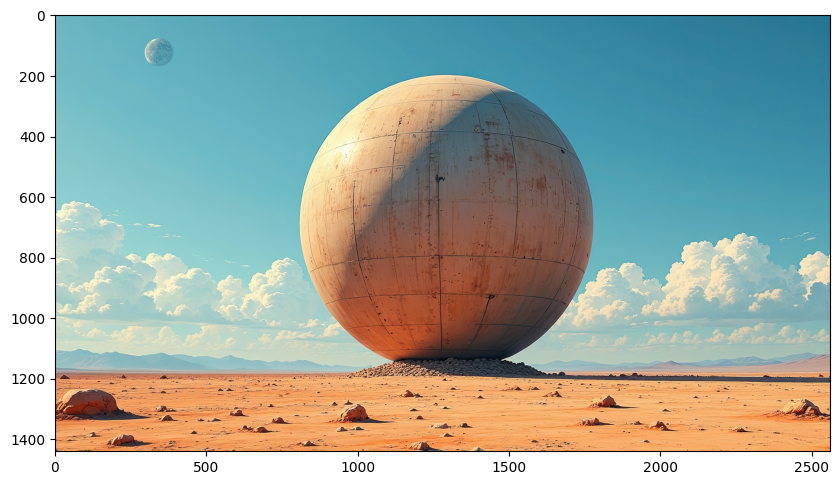

In [3]:
plt.figure(figsize=(10,10))
img = cv2.imread(image)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

Question 1

In [4]:
# image info

h,w,c = img.shape
print(f'height: {h}, width: {w}, channel: {c}')
size = img.size
print(f"Dimensions = {img.ndim}")
print(f"Size = {size}")


height: 1440, width: 2560, channel: 3
Dimensions = 3
Size = 11059200


In [7]:
# compression ratio
uncompressed = h*w*c
compressed_size = os.path.getsize(image)
compression_ratio = uncompressed/compressed_size
print(f'Uncompressed Size = {uncompressed}')
print(f'Compressed Size = {compressed_size}')
print(f'Compression Ratio = {compression_ratio}')

Uncompressed Size = 11059200
Compressed Size = 1960806
Compression Ratio = 5.640129620166401


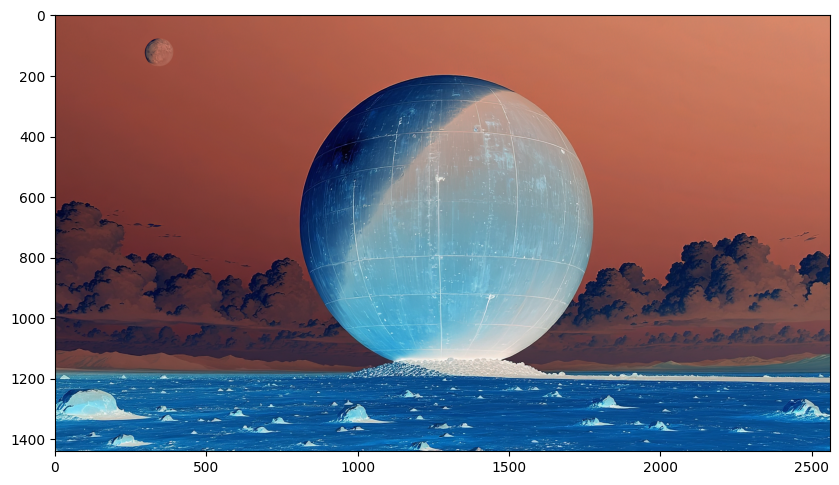

In [8]:
# negative
negative = 255 - img
plt.figure(figsize=(10,10))
plt.imshow(negative)

Question 2

/tmp/ipython-input-9-89483163.py:3: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img.ravel(),256,[0,256])


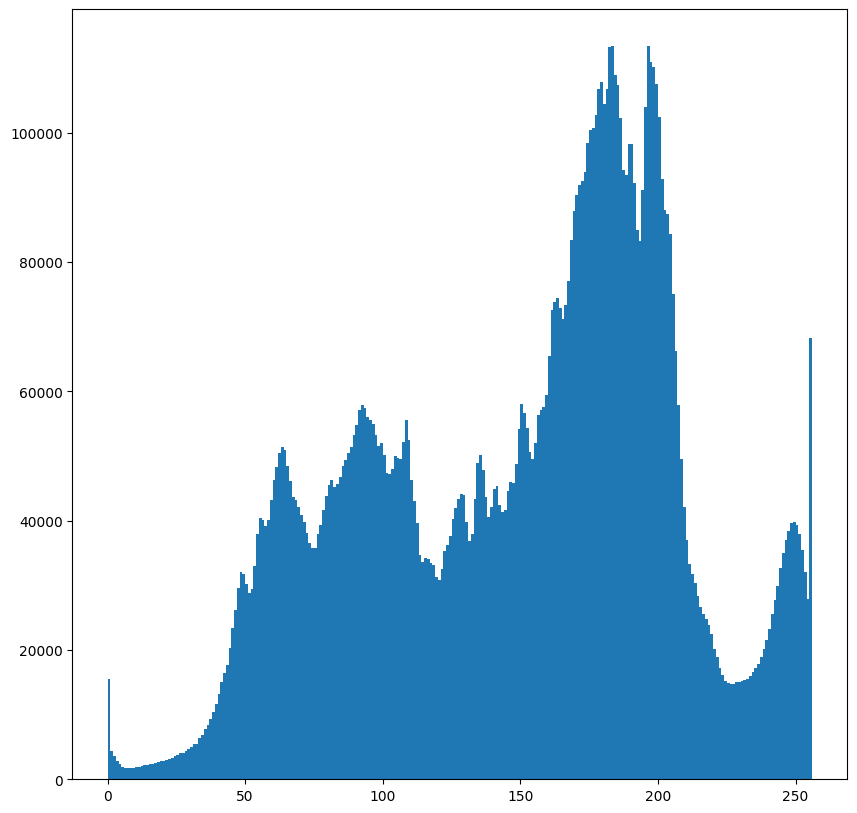

In [9]:
# histogram plot
plt.figure(figsize=(10,10))
plt.hist(img.ravel(),256,[0,256])
plt.show()

Question 3

/tmp/ipython-input-15-2247008677.py:8: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(equ.ravel(),256,[0,256])


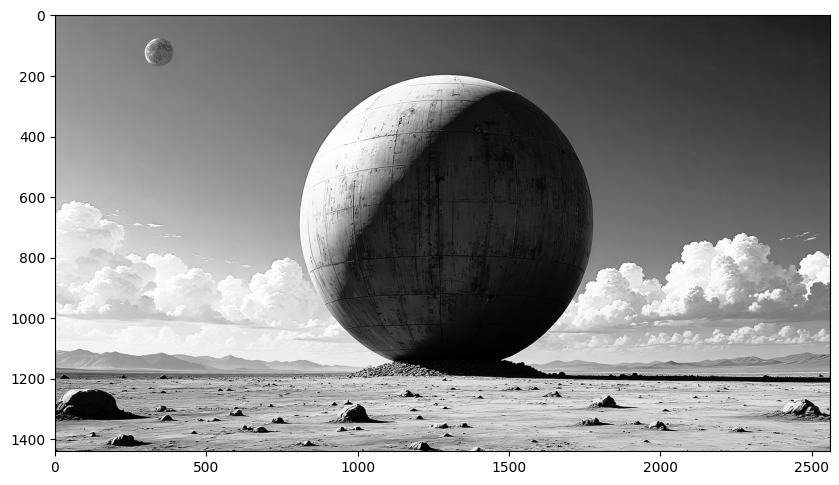

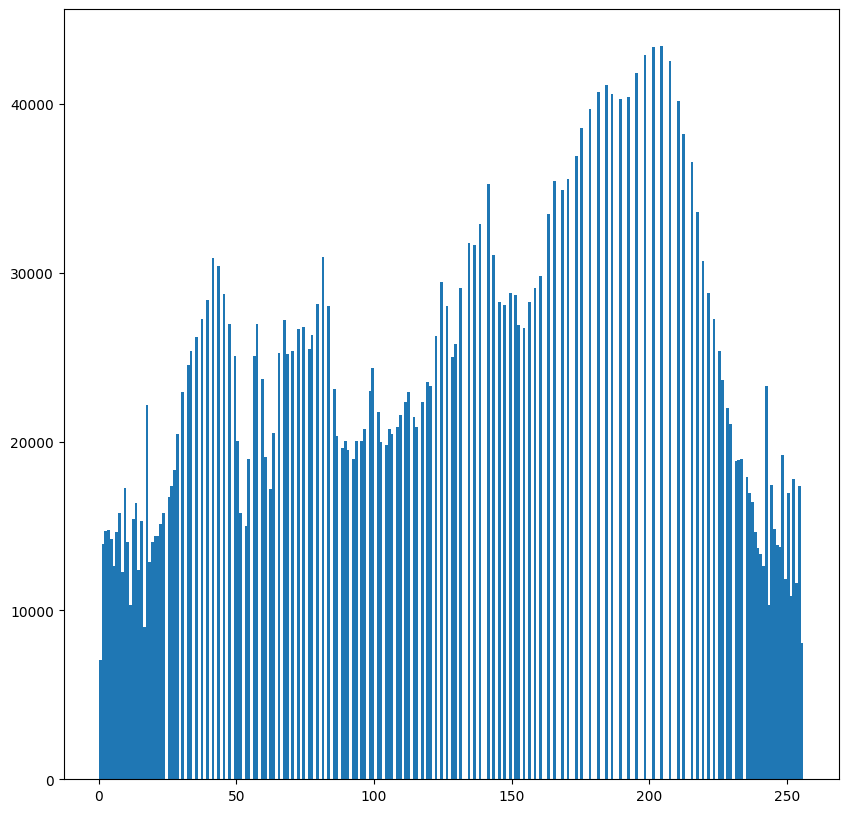

In [15]:
# histogram equalisation
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
equ = cv2.equalizeHist(gray_img)
plt.figure(figsize=(10,10))
plt.imshow(equ, cmap='gray')

plt.figure(figsize=(10,10))
plt.hist(equ.ravel(),256,[0,256])
plt.show()

Question 4

/tmp/ipython-input-16-2510241127.py:9: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(cl1.ravel(),256,[0,256])


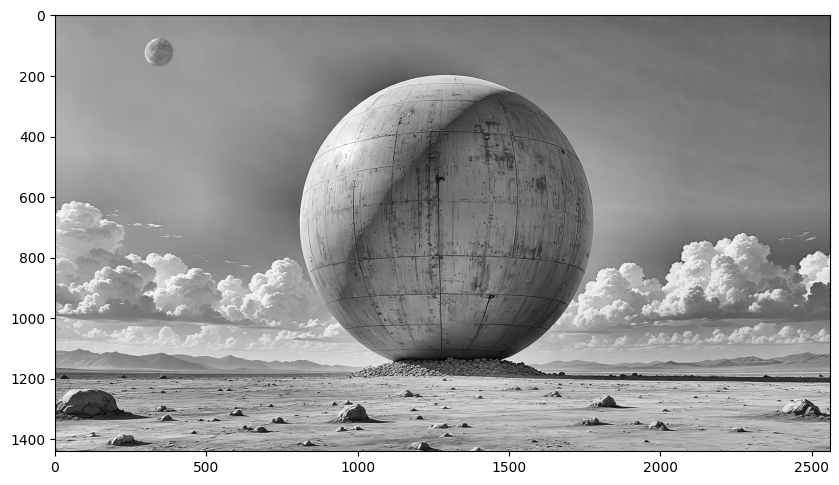

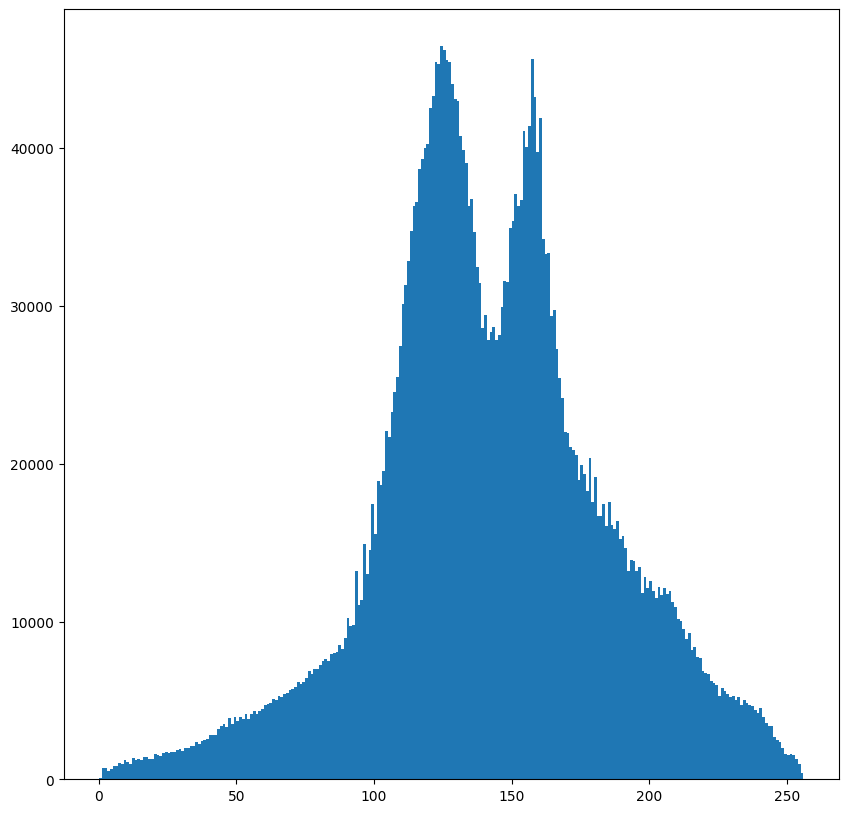

In [16]:
# local histogram equalisation

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(gray_img)
plt.figure(figsize=(10,10))
plt.imshow(cl1, cmap='gray')

plt.figure(figsize=(10,10))
plt.hist(cl1.ravel(),256,[0,256])
plt.show()

Question 5

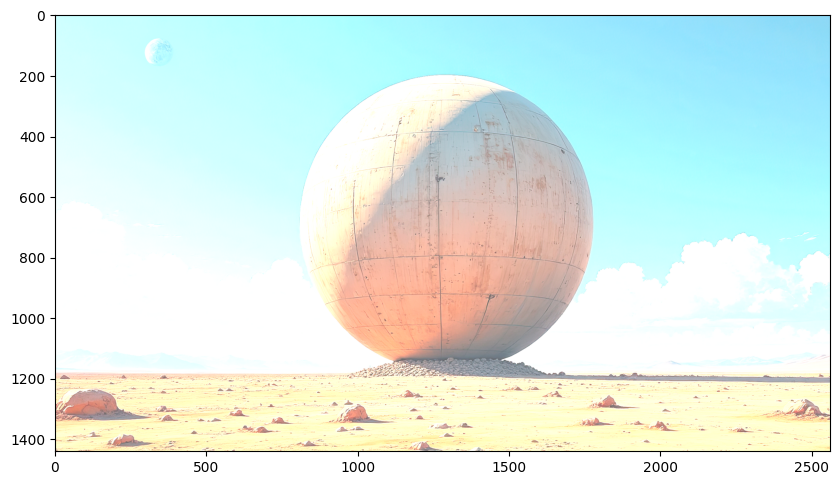

In [19]:
# image enhancments

# brightness
# brightness = cv2.convertScaleAbs(img, alpha=1, beta=100)
# plt.figure(figsize=(10,10))
# plt.imshow(brightness)

brightness_val = 100
bright_img = cv2.add(img, brightness_val)
plt.figure(figsize=(10,10))
plt.imshow(bright_img)

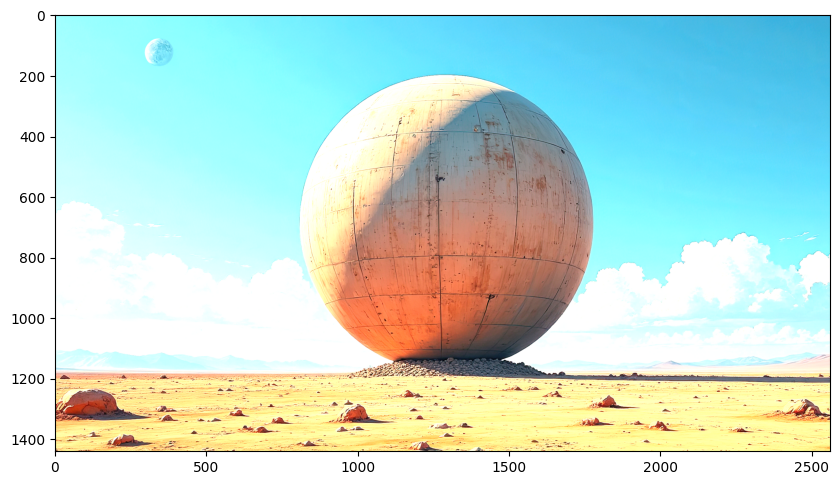

In [20]:
# contrast enhance
contrast_val = 1.5
contrast_img = cv2.convertScaleAbs(img, alpha=contrast_val, beta=0)
plt.figure(figsize=(10,10))
plt.imshow(contrast_img)

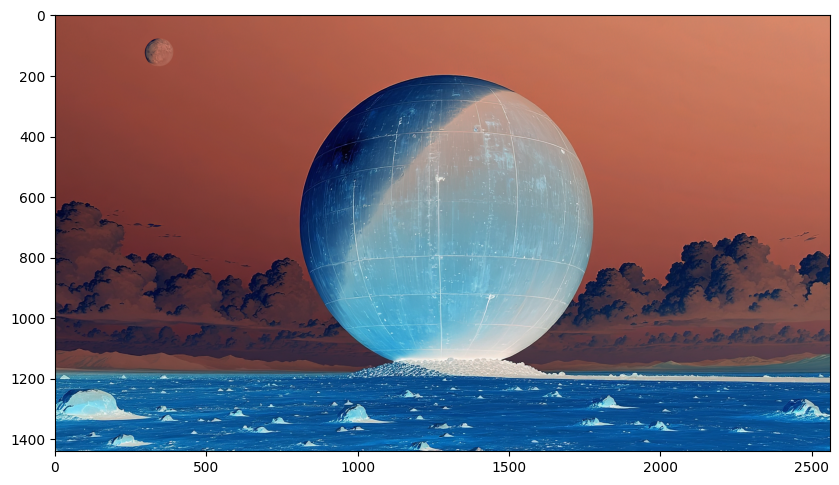

In [24]:
# complement img
# complement_img = 255 - img
complement_img = cv2.bitwise_not(img)
plt.figure(figsize=(10,10))
plt.imshow(complement_img)

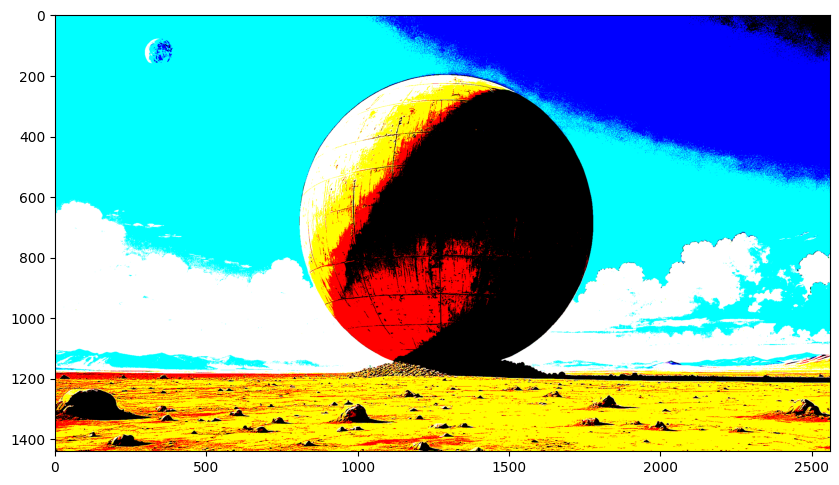

In [37]:
# binary contrast enhancment
ret, binary_img = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(10,10))
plt.imshow(binary_img)

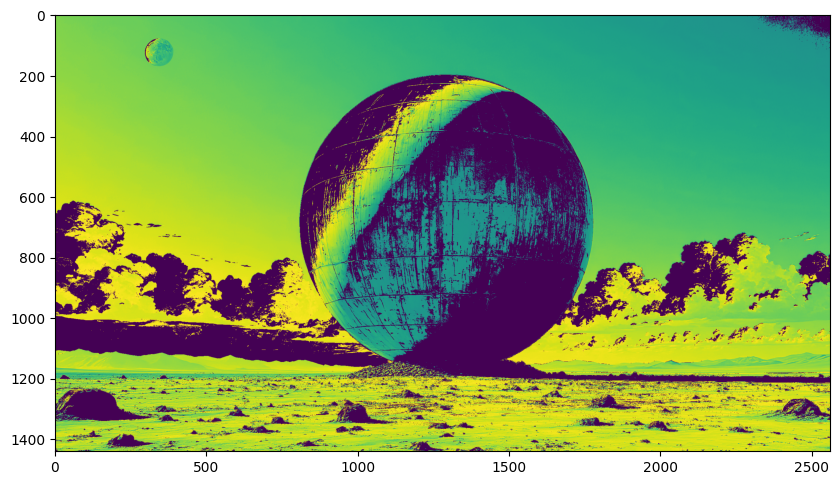

In [34]:
# brightness slicing
lower = 100
upper = 200
gray_image = cv2.imread(image, cv2.IMREAD_GRAYSCALE)
mask = cv2.inRange(gray_image, lower, upper)
slicing_img = cv2.bitwise_and(gray_image, gray_image, mask=mask)
plt.figure(figsize=(10,10))
plt.imshow(slicing_img)

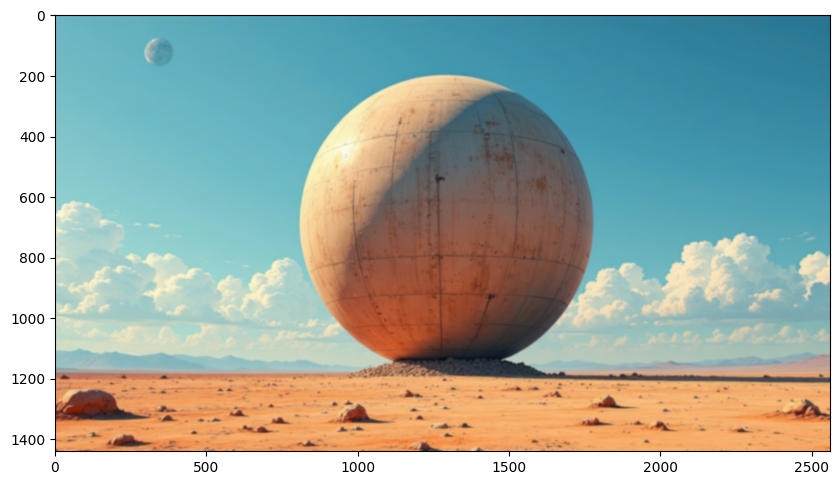

In [46]:
# low pass filtering -> blurring
kernel_size = (15,15)
low_pass = cv2.GaussianBlur(img, kernel_size, 0)
plt.figure(figsize=(10,10))
plt.imshow(low_pass)

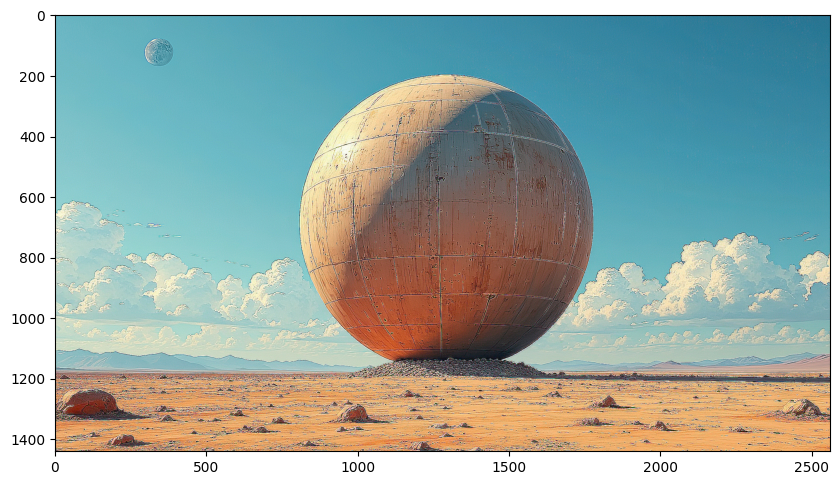

In [47]:
# high pass filter
high_pass = np.array([[-1,-1,-1,],
                      [-1,9,-1],
                      [-1,-1,-1]])
high_pass_img = cv2.filter2D(img, -1, high_pass)
plt.figure(figsize=(10,10))
plt.imshow(high_pass_img)